<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03  </font></center></h1>
<h2><center> <font color='black'> Classification problems</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**4 April at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).


### The homework is divided into four sections and the points are distributed as below:
<pre>
- Classification tasks       -> 8 points
- Improving classification   -> 2 points
__________________________________________
Total                        -> 10 points
</pre>

# 1. Classification tasks (8 points)

We are going to use the dataset from the file HR_Employee_Attrition.csv which contains data about the employees of a company and the fact if they have left the company due to reasons like retirement, resignation, elimination of a position, personal health, etc. It is important for companies to predict if their employees are going to leave because the hiring process is costly and requires planification. The data has the following columns:


Age – self descriptive

BusinessTravel – how frequent employee travels

DailyRate – daily rate on terms of salary

Department – self descriptive

DistanceFromHome – distance between employee home and work

Education – education level of employee

EducationField – self descriptive

EnvironmentSatisfaction – level of satisfaction with working environment

Gender – self descriptive

HourlyRate – self descriptive

JobRole – self descriptive

JobInvolvement – level of interest of the job

JobSatisfaction – level of satisfaction with current job

MaritalStatus – self descriptive

MonthlyIncome – self descriptive

MonthlyRate – self descriptive

NumCompaniesWorked – self descriptive

Over18 – whether customer age is more than 18

OverTime – whether customer works overtime or not

PerformanceRating – performance level of employee

RelationshipSatisfaction – level of satisfaction with working community

StandardHours – standard amount of hours that employee works

TotalWorkingYears – whether customer age is more than 18

TrainingTimesLastYear – whether customer age is more than 18

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
hr_data = pd.read_csv('HR_Employee_Attrition.csv', header=0)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Y,Yes,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,Y,No,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Y,Yes,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,Y,No,3,4,80,6,3,3,2,2,2,2


## 1.1 Dataset exploration (1.0 points)

**1.1.0.
Plot the correlation of the variables against ```Attrition```. (0.3 points)<br>Make sure you perform necessary preprocessing required for the plot.** 

In [3]:
hr_data.shape
hr_data.dtypes
# hr_data.isnull().sum() we have 0 null values
hr_new=hr_data.copy()
#Convertin the predictor variable in a binary numeric variable
hr_new['Attrition'].replace(to_replace='Yes', value=1, inplace=True)
hr_new['Attrition'].replace(to_replace='No',  value=0, inplace=True)

hr_dummies=pd.get_dummies(hr_new)
hr_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,4,5993,19479,8,3,1,80,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,3,61,2,2,5130,24907,1,4,4,80,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,4,92,2,3,2090,2396,6,3,2,80,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,4,56,3,3,2909,23159,1,3,3,80,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,40,3,2,3468,16632,9,3,4,80,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


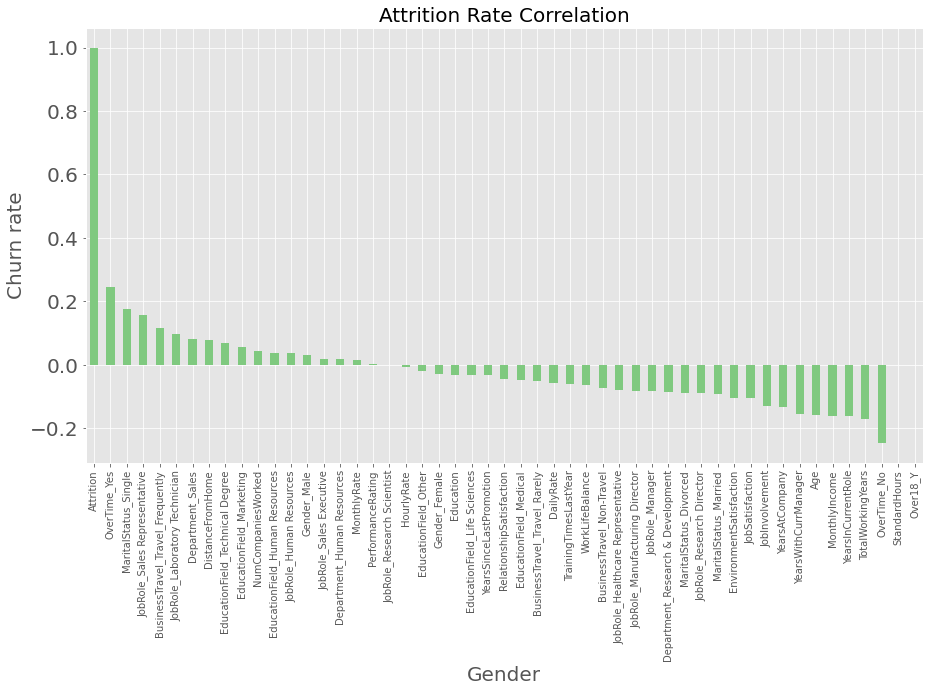

In [4]:
import matplotlib.cm as cm
from sklearn.preprocessing import normalize

#Get Correlation of "Churn" with other variables:

plt.figure(figsize=(15,8))
plt.style.use('ggplot')

# https://stackoverflow.com/questions/47302343/what-names-can-be-used-in-plt-cm-get-cmap
# Get a color map
my_cmap = cm.get_cmap('Accent')

hr_dummies.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set titles for figure, x, y
plt.title('Attrition Rate Correlation',fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Churn rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

**1.1.1. Write three interesting observation that you notice. (0.3 points)**

**<font color='red'>Answer 1:</font>** Over-time_yes workers are most likely to leave work while the over-time_no workers are the least likely to leave

**<font color='red'>Answer 2:</font>** Single people are more likely to leave their work places in comparison to divorced and married people

**<font color='red'>Answer 3:</font>** Feautures over_18_y, and StandardHours has nor correlation with Attrition rate

**1.1.2 Plot a boxplot for ```TotalWorkingYears``` for both Attrition categories. Explain the result. (0.3 points)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


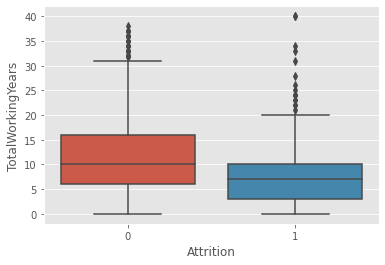

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(hr_dummies.Attrition, hr_dummies.TotalWorkingYears)


plt.show()

**<font color='red'>Answer:</font>** From the plot, we can see that workers working in acompany over 10 years are more likely to stay, while who works less that 10 years is more likley to leave. 

**1.1.3. Plot the relative frequency of Attrition values (Yes/No)  (0.1 points)**

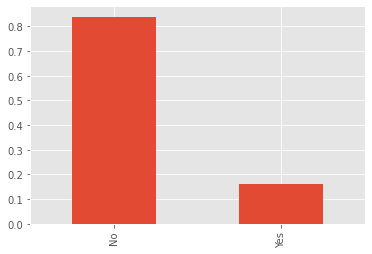

In [6]:
hr_data.Attrition.value_counts(normalize=True).plot(kind="bar")


## 1.2 Classification  (7 points)

**1.2.1 We will predict the variable ```Attrition``` by applying different classification algorithms and compare them. But before that we have to split the data into training and test set. And before splitting the dataset, please perform the following preprocessing. (0.5 points)**
* One hot encoding (You probably performed this in ```1.1.0```, in case if you have not)
* Drop three columns with least correlation values. (Use the plot from ```1.1.0```)
* Be a vigilante, and look for columns that has suspicious values. Drop those columns (at least 2 columns), it will not be much of a help in classification.
* Finally normalize the training variables, use the following Z-Score normalizing equation for normalization; <br>

$$x_{norm}= \frac{x -\mu}{\sigma}.$$ <br>

Here, $\mu$ = mean of the training variables, $\sigma$ = standard deviation of the training variables. <br>

What is **Z-score**: It is a a scaling method that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have mean = 0 and std = 1. It’s useful when there are a few outliers, but not so extreme that you need clipping. Clipping is another technique when you clip off (remove) outliers by visualizing the distribution of your dataset [1]. the following figure shows how Z-score impacts the values, notice the x-axis for both the figures.
<a href="https://ibb.co/XxL5S5y"><img src="https://i.ibb.co/VY9C2CH/img.png" alt="img" border="0"></a><br />
Ref: https://developers.google.com/machine-learning/data-prep/transform/normalization

In [7]:
from sklearn.model_selection import train_test_split
#TODO: one hot encoding

#TODO: drop three columns with least correlation
hr_drop = hr_dummies.drop(['OverTime_No', 'TotalWorkingYears', 'YearsInCurrentRole'], axis = 1)
#TODO: drop suspicious columns (there should be at least two)
hr_drop = hr_drop.drop(['Over18_Y', 'StandardHours'], axis = 1)
#They have same values for each row

#TODO: normalization
def z_score(hr_drop):
    hr_std = hr_drop.copy()
    for column in hr_std.columns:
        hr_std[column] = (hr_std[column] - hr_std[column].mean()) / hr_std[column].std()
        
    return hr_std
#Reference: https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475
hr_norm = z_score(hr_drop)

hr_norm = hr_norm.astype('int')
#Label type for "hr_norm" was continuous. So we have changed it

#TODO: split the dataset
X = hr_norm.loc[:, hr_norm.columns != 'Attrition']
Y = hr_norm['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 0)

**1.2.2 Use the scikit-learn DecisionTreeClassifier with default parameters to predict the attrition value for the test set. Set the random seed to 0. Calculate the accuracy score and print it. (0.4 points)**

In [8]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

model = DT(random_state=0)
#TODO: train the model
model = model.fit(X_train, y_train)
#TODO: predict on test set
prediction = model.predict(X_test)
#TODO: print accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, prediction)}')

Accuracy: 0.7891156462585034


**1.2.3 Plot the confusion matrix for the predicted values. Why accuracy is not a good metric to use in this case ? (0.4 points)**

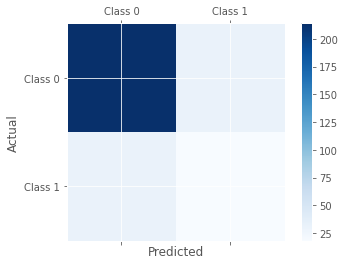

In [9]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
TP = conf_mat[0,0]
TN = conf_mat[1,1]
FN = conf_mat[1,0]
FP = conf_mat[0,1]
print(TP,TN,FP,FN)
print(f"Accuracy: {((TP+TN)/(TP+FP+FN+TN))*100}%")

214 18 31 31
Accuracy: 78.91156462585033%


In [11]:
yes = hr_drop[hr_data['Attrition'] == 'Yes']
no = hr_drop[hr_data['Attrition'] == 'No']

print(f"Dummy model ratio:\nThe frequency of 'Yes' in Attrition is {round((yes.shape[0]/hr_drop.shape[0])*100, 2)}%\nThe frequency of 'No' in Attrition is {round((no.shape[0]/hr_drop.shape[0])*100, 2)}%")

Dummy model ratio:
The frequency of 'Yes' in Attrition is 16.12%
The frequency of 'No' in Attrition is 83.88%


**<font color='red'>Answer:</font>** As the percentage of accuracy is 78.91% which means that the accuracy is good, however it is not enough.Because one class has high majority (78.91%) compare to another one and it cause imbalanced class. Also the percentage of 'No' is high compare to 'Yes' which is cause imbalanced class

**1.2.4 Formulate a dumy model (not a machine learning approach) to get 83.88% accuracy. Considering the label ratios how this model would look like? Be creative. You do not require to code for this, just a simple assumption and mathematical proof is necessary. (0.4 points)** <br>
Hint: There are two labels (yes, no) in your data.

**<font color='red'>Answer:</font>** By taking the 'No' value as a True we can get 83.88% accuracy

**1.2.5 Use export_graphviz from sklearn.tree to visualize the trained decision tree of ```1.2.2```. (0.4 points)**

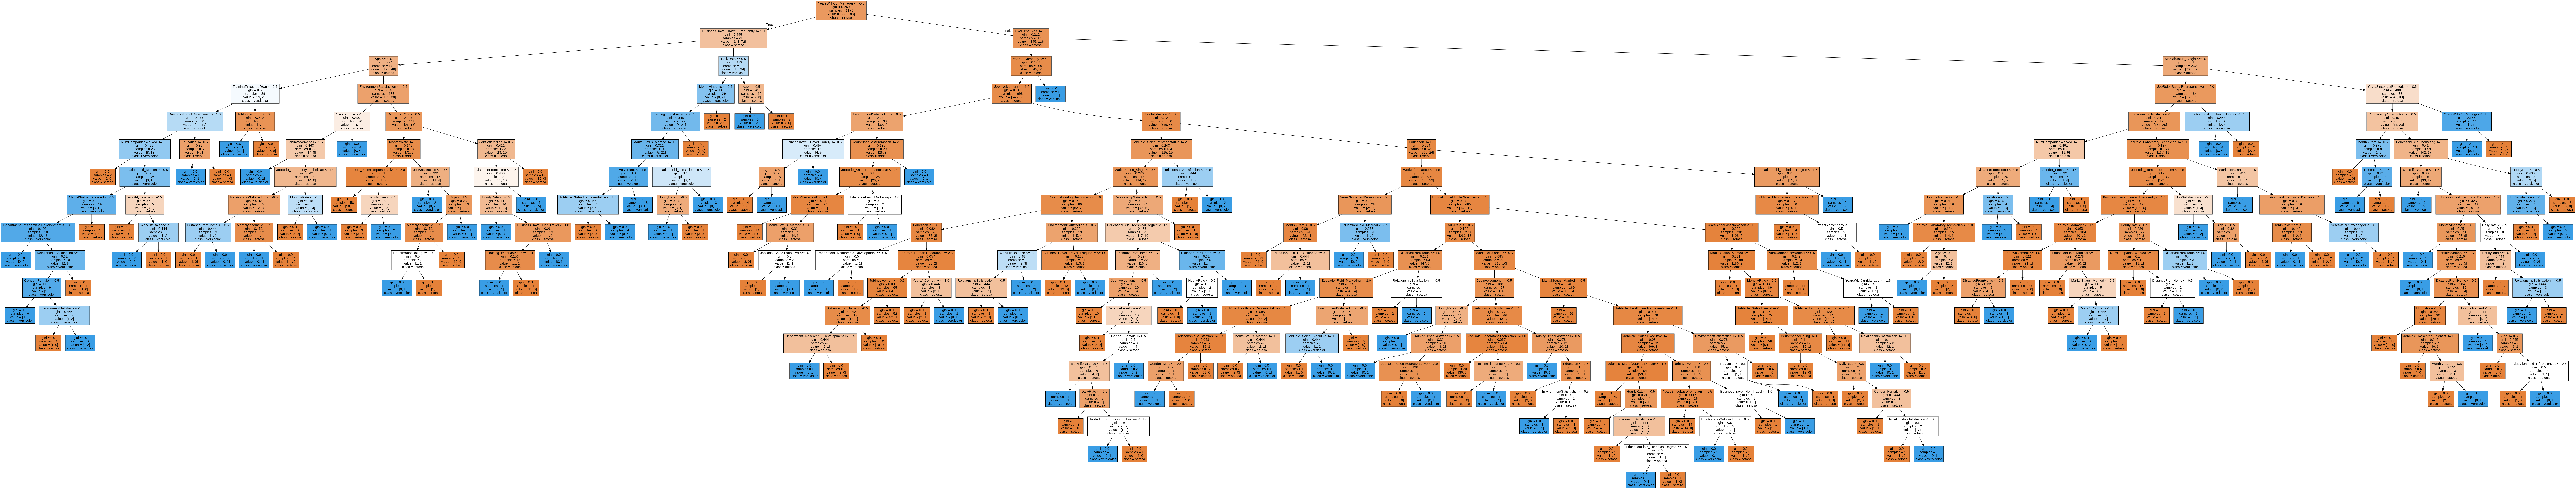

In [12]:
#!pip3 install graphviz
from sklearn import tree
from subprocess import check_call
from IPython.core.display import Image
cn=['setosa', 'versicolor', 'virginica']

tree.export_graphviz(model,
                     out_file="tree.dot",
                     feature_names = X.columns, 
                     class_names=cn,
                     filled = True)
#Reference: https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

check_call(['dot','-Tpng','tree.dot','-o','tree_result.png'])
#Reference: https://stackoverflow.com/questions/5316206/converting-dot-to-png-in-python

Image( filename ='tree_result.png')
#Reference: https://stackoverflow.com/questions/20597088/display-a-png-image-from-python-on-mint-15-linux


**1.2.6 Look at the visualization, what is the most important factor to decide if an employee is going to leave or not? (0.4 points)**

In [13]:
importance = model.feature_importances_
 
importance_df = pd.DataFrame(importance, X_train.columns)

importance_df.sort_values(0, ascending=False).head(5)

,0
YearsWithCurrManager,0.064168
RelationshipSatisfaction,0.059261
DistanceFromHome,0.057452
EnvironmentSatisfaction,0.053898
JobInvolvement,0.053127


**<font color='red'>Answer:</font>** The most important factor is "YearsWithCurrManager"


**1.2.7 Plot the classification report for the same decision tree. Which evaluation metrics out of precision and recall, would you consider for this specific case-study? Please elaborate your answer. (0.4 points)**

The classification report:
              precision    recall  f1-score   support

         Yes       0.87      0.87      0.87       245
          No       0.37      0.37      0.37        49

    accuracy                           0.79       294
   macro avg       0.62      0.62      0.62       294
weighted avg       0.79      0.79      0.79       294

The accuracy of precision is 87.34693877551021%
The accuracy of recall is 87.34693877551021%
Average precision-recall score: 0.24


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


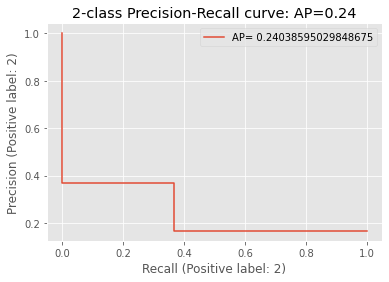

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

print(f"The classification report:\n{classification_report(y_test, prediction, target_names=['Yes', 'No'])}")
#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(f"The accuracy of precision is {TP/(TP+FP)*100}%\nThe accuracy of recall is {TP/(TP+FN)*100}%")
#The classififcation report did not find the accuracies. That's why we have calculated them separately

average_precision = average_precision_score(y_test, prediction, pos_label=2)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(model, X_test, y_test,label="AP= "+str(average_precision))
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.legend()

**<font color='red'>Answer:</font>** The result shows that the values of accuracy are the same. So, for this case-study we would choose precision 


**1.2.8 Calculate the F1 score of the model in training data and compare it with the F1 score in test  data. What is the phenomenon known as? (0.4 points)**

In [15]:
from sklearn.metrics import f1_score

prediction_train = model.predict(X_train)
print(f"\nF1_score on train data: {f1_score(y_train, prediction_train, pos_label=2)}")
print(f"\nF1_score on test data: {f1_score(y_test, prediction, pos_label=2)}")


F1_score on train data: 1.0

F1_score on test data: 0.36734693877551017


**<font color='red'>Answer:</font>** Results indicate that f1 score for train is higher than f1 score of test data. It comes from fitting of train data.(we got 1)


**1.2.9 Use cross validation score to ensure that our model is generalizing well. Try different combinations of maximum depth parameters for the decision tree and choose the best while using cross validation. Please complete the code below and report the best maximum depth. (0.5 points)**

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer
best_score = 0
best_depth = 0
for i in range(5, 25):
    clf = DT(max_depth=i, random_state = 0)
    #TODO: Perform 5-fold cross validation. 
    #set scoring metrics to f1
    scores = cross_val_score(estimator=clf,X=X, y=Y, scoring=make_scorer(f1_score, pos_label=2), cv=5)
    scores
    #TODO: calculate the mean score (f1)
    mean_score=scores.mean()
    
    #TODO: compare the mea scores to find the best depth
    if mean_score > best_score:
        best_score = mean_score
        best_depth = i
    print('Mean score', mean_score)

print('\n The best tree depth is: ', best_depth )

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
#

Mean score 0.25728271728271723
Mean score 0.3059670792634161
Mean score 0.3251094511878826
Mean score 0.34282654766975035
Mean score 0.34355895484656757
Mean score 0.35298127798127793
Mean score 0.38129983060417844
Mean score 0.3747167829614301
Mean score 0.35998856489422526
Mean score 0.3427912523847382
Mean score 0.36406984442237666
Mean score 0.35481061553485305
Mean score 0.3687856917313395
Mean score 0.34207097422378313
Mean score 0.34848808652324836
Mean score 0.35299206633299407
Mean score 0.35299206633299407
Mean score 0.35299206633299407
Mean score 0.35299206633299407
Mean score 0.35299206633299407

 The best tree depth is:  11


**1.2.10 Use SVM with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. Set the random_state equal to 0. (0.4 points)**

In [17]:
from sklearn.svm import SVC
svm_model = SVC(random_state=0)

#TODO: train the model
svm_model.fit(X_train,y_train)
#TODO: predict on test set
preds = svm_model.predict(X_test)
#TODO: calculate the metrics
acc = metrics.accuracy_score(y_test, preds)
rec=metrics.recall_score(y_test, preds,pos_label=2)
prec=metrics.precision_score(y_test, preds,pos_label=2)
f1_score=metrics.f1_score(y_test, preds, pos_label=2)
auc=metrics.roc_auc_score(y_test, preds)
print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)


Accuracy:  0.8503401360544217
Recall:  0.12244897959183673
Precision:  0.8571428571428571
F1_score:  0.21428571428571427
AUC:  0.5591836734693877


**1.2.11 Use Logistic Regression with default parameters to classify test data and report accuracy, recall, precision, f1-score, AUC. Set the random_state equal to 0 (0.4 points)**

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

#TODO: train the model
lr.fit(X_train,y_train)
#TODO: predict on test set
predl = lr.predict(X_test)
#TODO: calculate the metrics
acc = metrics.accuracy_score(y_test, predl)
rec=metrics.recall_score(y_test, predl,pos_label=2)
prec=metrics.precision_score(y_test, predl,pos_label=2)
f1_score=metrics.f1_score(y_test, predl, pos_label=2)
auc=metrics.roc_auc_score(y_test, predl)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

Accuracy:  0.8639455782312925
Recall:  0.40816326530612246
Precision:  0.6451612903225806
F1_score:  0.5000000000000001
AUC:  0.6816326530612244


**1.2.12 One of the parameters for the Logistic regression is tol which sets the tolerance for the stopping criteria. We are going to calculate the log loss metric for different values of tol. Please fill in the code below and plot the log loss values. Which one of tol values is better for our model based on log loss? (0.5 points)**


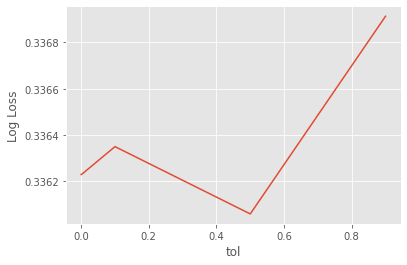

Best Tolerance, tol, Value:  0.5


In [19]:
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt

log_loss = []
for tol in [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]:
    
    #TODO: initialize the model
    lr_model=LogisticRegression(random_state=0, tol=tol)
    #TODO: train the model
    lr_model.fit(X_train,y_train)
    #TODO: predict on test set
    predlr=lr_model.predict_proba(X_test)
    #TODO: calculate logloss
    results= metrics.log_loss(y_test,predlr[:,1] )
    #TODO: use log_loss list to store the different logloss for different tol
    log_loss.append(results)
    
tol = [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]
plt.plot(tol, log_loss)
plt.ylabel("Log Loss")
plt.xlabel("tol")
plt.show()


#Findidng out the best tolerance value
min_index=(log_loss.index(min(log_loss)))
print("Best Tolerance, tol, Value: ", tol[min_index])

**1.2.13 Use Random Forest with default parameters to classify test data and report accuracy, recall, precision and f1-score and AUC. Set the random_state equal to 0. Please build as well a classification report separately which shows the metrics for each class. (0.4 points)**

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)

#TODO: train the model
rf_model.fit(X_train, y_train)
#TODO: predict on test set
predr = rf_model.predict(X_test)

#TODO: calculate the metrics
acc = metrics.accuracy_score(y_test, predr)
rec=metrics.recall_score(y_test, predr,pos_label=2)
prec=metrics.precision_score(y_test, predr,pos_label=2)
f1_score=metrics.f1_score(y_test, predr, pos_label=2)
auc=metrics.roc_auc_score(y_test, predr)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

#TODO: classification report
print(classification_report(y_test, predr,target_names=["Yes", "No"]))
print('Random Forest - Confusion Matrix \n', metrics.confusion_matrix(y_test, predr))


Accuracy:  0.8469387755102041
Recall:  0.10204081632653061
Precision:  0.8333333333333334
F1_score:  0.18181818181818182
AUC:  0.5489795918367346
              precision    recall  f1-score   support

         Yes       0.85      1.00      0.92       245
          No       0.83      0.10      0.18        49

    accuracy                           0.85       294
   macro avg       0.84      0.55      0.55       294
weighted avg       0.84      0.85      0.79       294

Random Forest - Confusion Matrix 
 [[244   1]
 [ 44   5]]


**1.2.14 Use the model from ```1.2.13```, calculate the predicted probability on test set. Threshold the probabilities such that it will output the class 'No'  only if the probability is 70% or higher. Otherwise, it will predict 'Yes'. (0.3 points)**


In [21]:
#TODO: predict probability on test set
predr = rf_model.predict_proba(X_test)
#TODO: threshold probability
y_pred_threshold = (predr[:, 1]>=0.7).astype('int') #use this variable to store value

print(y_pred_threshold)

print('Random Forest with Threshold - Confusion Matrix \n', metrics.confusion_matrix(y_test, y_pred_threshold))


#https://machinelearningmastery.com/make-predictions-scikit-learn/

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Forest with Threshold - Confusion Matrix 
 [[245   0]
 [ 49   0]]


**1.2.15 Print the classification report agian. Do you think there were some improvements regarding the classification for class Yes? Explain your answer briefly. (0.4 points)**

In [22]:
print(metrics.classification_report(y_test, y_pred_threshold,target_names=["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.83      1.00      0.91       245
          No       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**<font color='red'>Answer:</font>** Yes, we see imporvements regarding the classification of the results. As it can be seen, by defining  the threshold value, the model’s sensitivity decreases and specificity increases.

**1.2.16 Use XGBoost with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. (0.3 points)**

In [23]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

#TODO: train the model
xgb_model.fit(X_train,y_train)
#TODO: predict on test set
predx = xgb_model.predict(X_test)
#TODO: calculate the metrics
acc = metrics.accuracy_score(y_test, predx)
rec=metrics.recall_score(y_test, predx,pos_label=2)
prec=metrics.precision_score(y_test, predx,pos_label=2)
f1_score=metrics.f1_score(y_test, predx, pos_label=2)
auc=metrics.roc_auc_score(y_test, predx)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

Accuracy:  0.8571428571428571
Recall:  0.24489795918367346
Precision:  0.7058823529411765
F1_score:  0.36363636363636365
AUC:  0.6122448979591837


**1.2.17 For unbalanced datasets, choose the best classifier (based on evaluation metrics that seems good for this case-study) and plot its feature importances in decreasing order. Were the 3 most important features as you expected, you can use ```1.2.5``` as reference? Please explain why. (0.5 points)**

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)

#TODO: train the model
rf_model.fit(X_train, y_train)
#TODO: predict on test set
predr = rf_model.predict(X_test)

#TODO: calculate the metrics
acc = metrics.accuracy_score(y_test, predr)
rec=metrics.recall_score(y_test, predr,pos_label=2)
prec=metrics.precision_score(y_test, predr,pos_label=2)
f1_score=metrics.f1_score(y_test, predr, pos_label=2)
auc=metrics.roc_auc_score(y_test, predr)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

#TODO: plot the feature importance
importance = rf_model.feature_importances_
 
importance_rf = pd.DataFrame(importance, X_train.columns)

importance_rf.sort_values(0, ascending=False).head(5)


Accuracy:  0.8469387755102041
Recall:  0.10204081632653061
Precision:  0.8333333333333334
F1_score:  0.18181818181818182
AUC:  0.5489795918367346


,0
OverTime_Yes,0.051182
YearsWithCurrManager,0.050779
WorkLifeBalance,0.050479
EnvironmentSatisfaction,0.045139
JobInvolvement,0.044576


**<font color='red'>Answer:</font>** Referring to our previus code in 1.2.7, we defined precision value to consider as a main value for this case study. So, for the precision value, it seems that Random Forest Classifier is the best option to choose( precision is 87.34 %)

In regards to 3 most important feature selection, previously they were YeasrWithCurrManager, RelationshipSatisfaction, DistanceFromHome. But after applying our chosed classiifcation method, we see that the most important feature indicates as following: OverTime_Yes, YearsWithCurrManager,WorkLifeBalance

# 2. Improving classification (2 points)

**2.1 Do you think it is better to try oversampling or downsampling in this case study and why ? (0.4 points)** 

**<font color='red'>Answer:</font>** In terms of our case, it is clear that oversampling is preferable because it keeps all of the knowledge in the training dataset. We miss a lot of details when do undersampling. And if the fallen information belongs to the plurality class, it is valuable information for a modeling algorithm.

**2.2 Apply oversampling to the data while keeping random_state equal to 0. (0.2 points)**

In [25]:
from imblearn.over_sampling import RandomOverSampler
#TODO: apply oversampling

class_0, class_1 = hr_norm.Attrition.value_counts()  

df_class_0 = hr_norm[hr_norm['Attrition'] == 0]
df_class_1 = hr_norm[hr_norm['Attrition'] == 2]

# class 1: minority class
# class 0: majority class

df_class_1_over = df_class_1.sample(class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Attrition.value_counts())

#In the result 2 means 1(Yes)

Random over-sampling:
2    1233
0    1233
Name: Attrition, dtype: int64


**2.3 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Train a random forest model, test it and report accuracy, precision, recall, f1-score and AUC. (0.5 points)** 

In [26]:
#TODO: split dataset in 80/20 ratio. set random_state=0, use randomforest model from
X_over = df_test_over.loc[:, df_test_over.columns != 'Attrition']
Y_over = df_test_over['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X_over, Y_over,
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 0)
#TODO: train a rf model on oversampled data
rf_model_over = RandomForestClassifier(random_state = 0)
rf_model_over.fit(X_train, y_train)
#TODO: predict on test set
predr_over = rf_model_over.predict(X_test)
#TODO: calculate metrics
acc = metrics.accuracy_score(y_test, predr_over)
rec = metrics.recall_score(y_test, predr_over,pos_label=2)
prec = metrics.precision_score(y_test, predr_over,pos_label=2)
f1_score = metrics.f1_score(y_test, predr_over, pos_label=2)
auc = metrics.roc_auc_score(y_test, predr_over)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)


Accuracy:  0.9757085020242915
Recall:  0.9959016393442623
Precision:  0.9566929133858267
F1_score:  0.9759036144578312
AUC:  0.975950819672131


**2.4 Apply undersampling to the data while keeping random_state equal to 0. (0.2 points)**

In [27]:
from imblearn.under_sampling import RandomUnderSampler
#TODO: apply undersampling

df_class_0_under = df_class_0.sample(class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Attrition.value_counts())

#In the result 2 means 1(Yes)

Random under-sampling:
2    237
0    237
Name: Attrition, dtype: int64


**2.5 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 to classify the test data and report accuracy, precision, recall, f1-score and AUC. (0.5 points)** 

In [28]:
#TODO: split dataset in 80/20 ratio. set random_state=0, use randomforest model from 
X_under = df_test_under.loc[:, df_test_under.columns != 'Attrition']
Y_under = df_test_under['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under,
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 0)
#TODO: train a rf model on undersampled data
rf_model_under = RandomForestClassifier(random_state = 0)
rf_model_under.fit(X_train, y_train)
#TODO: predict on test set
predr_under = rf_model_under.predict(X_test)
#TODO: calculate metrics
acc = metrics.accuracy_score(y_test, predr_under)
rec = metrics.recall_score(y_test, predr_under,pos_label=2)
prec = metrics.precision_score(y_test, predr_under,pos_label=2)
f1_score = metrics.f1_score(y_test, predr_under, pos_label=2)
auc = metrics.roc_auc_score(y_test, predr_under)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

Accuracy:  0.7473684210526316
Recall:  0.8444444444444444
Precision:  0.6909090909090909
F1_score:  0.7599999999999999
AUC:  0.7522222222222221


**2.6 Which one performed better between over and under sampling (0.2 points)** 

<font color='red'> **Answer:**</font> As we assumed before the over sampling works better. Because the results are more close to 1